In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [179]:
df = pd.read_csv('b_depressed.csv')

df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [180]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [181]:
df.shape

(1429, 23)

In [182]:
df['no_lasting_investmen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1429 entries, 0 to 1428
Series name: no_lasting_investmen
Non-Null Count  Dtype  
--------------  -----  
1409 non-null   float64
dtypes: float64(1)
memory usage: 11.3 KB


In [183]:
df['no_lasting_investmen'].describe()

count    1.409000e+03
mean     3.360385e+07
std      2.160228e+07
min      1.263120e+05
25%      2.064203e+07
50%      2.829271e+07
75%      4.151762e+07
max      9.965119e+07
Name: no_lasting_investmen, dtype: float64

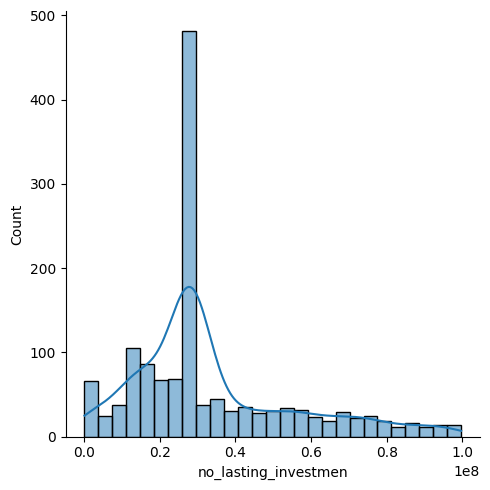

In [184]:
sns.displot(df['no_lasting_investmen'], kde = True)

In [185]:
import statistics

In [186]:
df['no_lasting_investmen'] = df['no_lasting_investmen'].fillna(statistics.mode(df['no_lasting_investmen']))

df.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [187]:
df.drop(['Survey_id', 'Ville_id'], axis=1, inplace=True)

df.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1429 non-null   int64  
 1   Age                    1429 non-null   int64  
 2   Married                1429 non-null   int64  
 3   Number_children        1429 non-null   int64  
 4   education_level        1429 non-null   int64  
 5   total_members          1429 non-null   int64  
 6   gained_asset           1429 non-null   int64  
 7   durable_asset          1429 non-null   int64  
 8   save_asset             1429 non-null   int64  
 9   living_expenses        1429 non-null   int64  
 10  other_expenses         1429 non-null   int64  
 11  incoming_salary        1429 non-null   int64  
 12  incoming_own_farm      1429 non-null   int64  
 13  incoming_business      1429 non-null   int64  
 14  incoming_no_business   1429 non-null   int64  
 15  inco

In [189]:
categorical = ['sex', 'Married', 'Number_children', 'education_level', 'total_members']

for x in categorical:
  print(f"{x} : {df[x].unique()}")

sex : [1 0]
Married : [1 0]
Number_children : [ 4  3  2  6  1  7  0  5  8  9 10 11]
education_level : [10  8  9  1 12  7  6  4 11 13 14  5 18  3 17 16 19  2]
total_members : [ 5  4  6  8  3  9  2  1  7 10 12 11]


Ok so we have done the basic exploration and cleaning of the data. The data is already cleaned just we imputed the long term investment feature.

Now let us begin with the EDA process...

# Exploratory Data Analysis

Checking whether married people tend to be depressed or not.

In [190]:
pd.crosstab(df['Married'], df['depressed'])

depressed,0,1
Married,,
0,257,68
1,934,170


In [191]:
per_un_depressed = (68/(257+68))*100

per_m_depressed = (170/(934+170))*100

print("Unmarried and Depressed", per_un_depressed)
print("Married and Depressed", per_m_depressed)

Unmarried and Depressed 20.923076923076923
Married and Depressed 15.39855072463768


Conclusion: Not much significant level of difference has been since with regards to marraige. Being unmarried however has a slight effect on being depressed, with 5% difference.

Let us preprocess the education level into

Primary: 1 to 8

secondary: 9 to 12

college (Assume 3 years): 13 to 16

Post Graduate: 17 and above

In [192]:
def categorize_education(x):
  if x in list(range(1,9)):
    return "Primary"

  elif x in list(range(9, 13)):
    return "Secondary"

  elif x in list(range(13, 17)):
    return "Graduate"

  else:
    return "Post Graduate"

df['education_level'] = df['education_level'].apply(categorize_education)

df['education_level'].unique()

array(['Secondary', 'Primary', 'Graduate', 'Post Graduate'], dtype=object)

In [193]:
df.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,Secondary,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,Primary,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,Secondary,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,Secondary,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,Secondary,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


Analysing The Education Level and Depression Relation

In [194]:
pd.crosstab(df['education_level'], df['depressed'])

depressed,0,1
education_level,,
Graduate,78,12
Post Graduate,4,2
Primary,393,108
Secondary,716,116


In [195]:
df.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

Here also we do not see any special pattern with the number of children and then being depressed. Then we will use crosstab to calculate the percentage

In [196]:
pd.crosstab(df['Number_children'], df['depressed'])

depressed,0,1
Number_children,,
0,116,38
1,172,15
2,243,51
3,256,51
4,189,40
5,107,20
6,65,9
7,25,10
8,15,2


We do not get any special inference from the number of children affecting the mental state of the person

In [197]:
df.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [198]:
def generate_percentage_age(df):
  series_set = df['Age'].unique()

  percentage_depressed = []

  for x in series_set:
    condition1 = (df['Age'] == x) & (df['depressed'] == 0)
    condition2 = (df['Age'] == x) & (df['depressed'] == 1)

    notDepressed = len(df[condition1])
    isdepressed  = len(df[condition2])

    percentage  = (isdepressed/(notDepressed+isdepressed))*100

    percentage_depressed.append(percentage)

  new_df = pd.DataFrame()

  new_df['Ages'] = series_set
  new_df['Percentage Depressed'] = percentage_depressed

  return new_df

In [199]:
df2 = generate_percentage_age(df)

df2.head()

,Ages,Percentage Depressed
0,28,11.475410
1,23,15.277778
2,22,15.942029
3,27,14.062500
4,59,8.333333


In [200]:
val = df2.corr()
val

,Ages,Percentage Depressed
Ages,1.000000,0.332791
Percentage Depressed,0.332791,1.000000


More the age, more the depression, as per the above dataframe

In [201]:
val = max(df2['Percentage Depressed'])

dt = df2[(df2['Percentage Depressed'] == val)]

dt

,Ages,Percentage Depressed
10,84,100.0
45,74,100.0
54,70,100.0
65,87,100.0
66,50,100.0
70,77,100.0


Older Ages show high rate of depression, but also they are less represented in the dataset.

In [202]:
x = df2.sort_values(by = 'Ages')

x.head()

,Ages,Percentage Depressed
38,17,25.000000
27,18,10.526316
23,19,5.405405
26,20,8.163265
7,21,10.869565


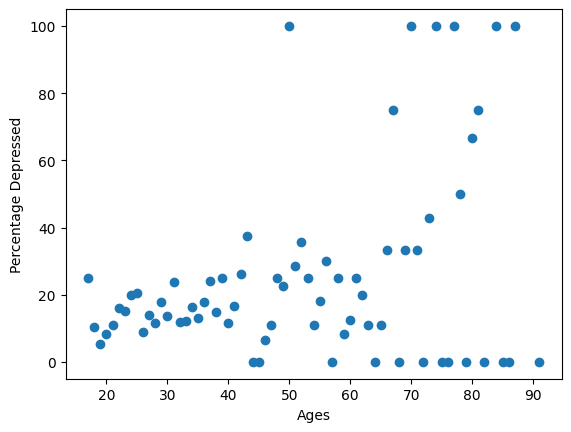

In [203]:
plt.scatter(x = x['Ages'], y = x['Percentage Depressed'])
plt.xlabel('Ages')
plt.ylabel('Percentage Depressed')
plt.show()

Insights: As age increases, the percentage depressed does increase, however in the senior citizen category, we see that there is a balance between being depressed and not depressed, so we can understand that during the old age, the percentage depressed is actually balanced as some old age people do not report to be depressed but some do.

In [204]:
df.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [205]:
df.describe()

,sex,Age,Married,Number_children,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.429000e+03,1429.000000
mean,0.918125,34.777467,0.772568,2.883135,4.969209,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.352952e+07,0.166550
std,0.274271,13.986219,0.419320,1.874472,1.786317,2.003854e+07,1.815672e+07,1.775137e+07,2.101528e+07,2.170266e+07,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.145955e+07,0.372704
min,0.000000,17.000000,0.000000,0.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,1.729660e+05,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,1.000000,25.000000,1.000000,2.000000,4.000000,2.326982e+07,1.929852e+07,2.339998e+07,2.088671e+07,2.098014e+07,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.074791e+07,0.000000
50%,1.000000,30.000000,1.000000,3.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1.000000,42.000000,1.000000,4.000000,6.000000,3.717283e+07,2.656950e+07,2.339998e+07,3.843689e+07,4.051889e+07,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.088368e+07,0.000000
max,1.000000,91.000000,1.000000,11.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,9.982380e+07,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [206]:
df.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,Secondary,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,Primary,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,Secondary,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,Secondary,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,Secondary,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [207]:
def mapping(x):
  if x=='Primary':
    return 1
  elif x=='Secondary':
    return 2
  elif x=='Primary':
    return 3
  else:
    return 4

df['education_level'] = df['education_level'].apply(mapping)

df.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,2,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,1,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,2,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,2,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,2,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [208]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

cols = list(df.columns)
cols.remove('depressed')

for x in cols:
  df[x] = sc.fit_transform(df[[x]])

df.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,0.298625,-0.484751,0.542572,0.596038,0.285770,0.017243,-0.235742,-0.237517,-0.226807,-0.275624,...,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.244117,0
1,0.298625,-0.842371,0.542572,0.062367,-1.035802,0.017243,-0.235742,-0.237517,-0.226807,-0.275624,...,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.244117,1
2,0.298625,-0.913895,0.542572,0.062367,0.285770,0.017243,-0.235742,-0.237517,-0.226807,-0.275624,...,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.244117,0
3,0.298625,-0.556275,0.542572,-0.471303,0.285770,-0.542764,0.950134,-0.411785,1.252338,-1.527273,...,-0.468277,1.723208,-0.34754,1.685645,-0.588427,-0.792761,-0.520915,-1.188710,1.663723,0
4,-3.348683,1.732492,-1.843074,0.596038,0.285770,0.577250,2.444737,-0.541053,-0.226807,2.303656,...,2.135489,-0.580313,-0.34754,-0.593245,0.908671,-0.699010,1.919699,-0.607845,0.461025,0


In [209]:
from sklearn.model_selection import train_test_split

X = df[cols]
y = df['depressed']
model = LogisticRegression(max_iter = 1000)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state=4)

x_train.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
1174,0.298625,1.017252,-1.843074,0.062367,0.285770,0.017243,-0.235742,-0.237517,-0.226807,-0.275624,-0.251820,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.244117
402,0.298625,1.732492,-1.843074,-1.538644,-1.035802,0.017243,-0.235742,-0.237517,-0.226807,-0.275624,-0.251820,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.244117
441,0.298625,-0.627799,0.542572,0.596038,-1.035802,0.577250,-0.029552,-0.932384,-0.226807,0.994958,-0.813593,-0.468277,1.723208,-0.34754,-0.593245,-0.273587,1.561549,-0.520915,-0.908962,-1.063422
1352,0.298625,0.516584,-1.843074,1.129708,-1.035802,0.017243,-0.235742,-0.237517,-0.226807,-0.275624,-0.251820,-0.468277,-0.580313,-0.34754,-0.593245,-0.215759,-0.195493,-0.520915,-0.215972,-0.244117
179,0.298625,-1.056943,0.542572,1.663379,-1.035802,1.697264,-0.235742,-0.773558,-0.226807,-1.469970,0.699724,2.135489,-0.580313,-0.34754,-0.593245,-0.215759,0.847356,1.919699,-0.906181,-0.219180


In [210]:
x_train.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen'],
      dtype='object')

In [211]:
x_test.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen'],
      dtype='object')

In [212]:
num_features = len(df.columns)
num_features

21

In [213]:
model1 = LogisticRegression(max_iter = 1000)

In [214]:
from sklearn.feature_selection import RFE

In [215]:
rfe = RFE(model1, n_features_to_select=7)

In [216]:
model1 = LogisticRegression()

#Using Recursive Feature Elimination
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
num_features = len(df.columns)

def find_best_features(model, n, x_train, x_test, y_train, y_test):
  for i in range(1,n+1):
    rfe = RFE(model, n_features_to_select=i)
    fit = rfe.fit(x_train,y_train)
    selected_cols = x_train.columns[fit.support_]

    md = LogisticRegression()
    md.fit(x_train[selected_cols], y_train)
    print(f"No of features {i} with accuracy {md.score(x_test[selected_cols],y_test)}")
    print(f"{selected_cols}")


find_best_features(model1, num_features, x_train, x_test, y_train, y_test)

No of features 1 with accuracy 0.8444055944055944
Index(['Age'], dtype='object')
No of features 2 with accuracy 0.8444055944055944
Index(['Age', 'living_expenses'], dtype='object')
No of features 3 with accuracy 0.8444055944055944
Index(['Age', 'living_expenses', 'no_lasting_investmen'], dtype='object')
No of features 4 with accuracy 0.8444055944055944
Index(['Age', 'living_expenses', 'incoming_business', 'no_lasting_investmen'], dtype='object')
No of features 5 with accuracy 0.8444055944055944
Index(['Age', 'durable_asset', 'living_expenses', 'incoming_business',
       'no_lasting_investmen'],
      dtype='object')
No of features 6 with accuracy 0.8444055944055944
Index(['Age', 'total_members', 'durable_asset', 'living_expenses',
       'incoming_business', 'no_lasting_investmen'],
      dtype='object')
No of features 7 with accuracy 0.8444055944055944
Index(['Age', 'Number_children', 'total_members', 'durable_asset',
       'living_expenses', 'incoming_business', 'no_lasting_investm

Based on the domain/business knowledge, we will choose our number of features as selected in recursive feature elimination.